反向传播，即为向前计算到最后，再回过来计算每一步的梯度如下图所示：  
![](https://pic.imgdb.cn/item/65815c76c458853aefe6a840.jpg)

在向前计算时，先计算这一步的梯度，然后等到传播完毕，即 loss 之后，再反向就算需要的梯度$\frac{\partial loss}{\partial w}$

Pytorch中，基础的数据类型是 tensor， 包含 data 和 grid 两个类型，grid 类型也是一个 tensor ，若要转换为python原生的类型，可以调用 `tensorName.grid.item()` ，并且 Pytorch 默认 tensor 是不保存梯度的，若要保存梯度，需要调用 `tensorName.requires_grid = True`

下面给出随机梯度下降算法的 Pytorch 写法

In [39]:
import torch
import matplotlib.pyplot as plt

In [40]:
x_data = [1, 2, 3, 4]
y_data = [2, 4, 6, 8]

In [41]:
w = torch.Tensor([1.0])     # 注意要加中括号
w.requires_grad = True

In [42]:
# 因为 w 是 tensor ，因此 x 会进行隐式类型转换
def forward(x):
    return x * w

# 整个函数实际上构建了一个计算图，即最上面那幅图，整个过程因为只有 tensor 类型的 w 变量需要保存梯度，
# 因此最终调用 loss.backward() 后会计算 w.grad
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y) ** 2

def cost(xx, yy):
    sum = 0
    for x, y in zip(xx, yy):
        y_pred = x * w.data
        ls = (y_pred - y) ** 2
        sum += ls
    return sum / len(xx)

In [43]:
epoch_list = []
cost_list = []

for epoch in range(100) :
    for x, y in zip(x_data, y_data):
        l = loss(x, y)          # 构建计算图
        l.backward()            # 反向传播

        w.data -= 0.01 * w.grad.data    # 只对 data 进行计算，防止对 tensor 计算再次构建计算图

        w.grad.data.zero_()             # 不保存
    cost_list.append(cost(x_data, y_data))
    epoch_list.append(epoch)


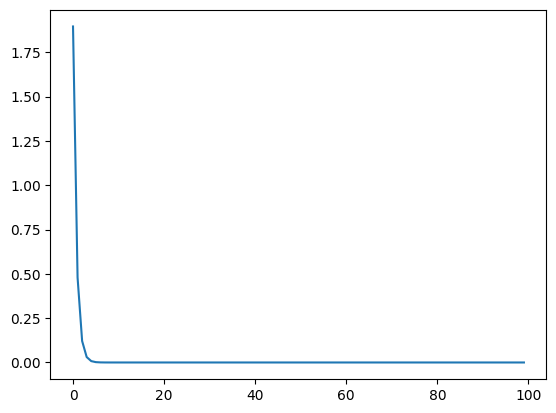

In [44]:
plt.plot(epoch_list, cost_list)
plt.show()